This is used as a "fourth core" to perform seemingly parallel experiments. In this case we do stuff related to experiment 94.

In [1]:
import numpy as np
from numpy import zeros, eye, array, diag, exp, ones, tanh, cosh, dstack, log, hstack, vstack, sinh
from numpy.linalg import solve, norm
from numpy.random import choice, default_rng, randint, randn
from scipy.stats import multivariate_normal as MVN
from scipy.special import logsumexp, ndtr
from scipy.stats import uniform as udist
import math
import time
from copy import deepcopy

import matplotlib.pyplot as plt
from matplotlib import rc
from ipywidgets.widgets import IntSlider
from ipywidgets.widgets import interact
from warnings import resetwarnings, catch_warnings, filterwarnings
import seaborn as sns
import pickle

from Manifolds.GKManifoldNew import GKManifold, data_generator, find_point_on_manifold, find_point_on_manifold_from_θ
from markov_snippets import MSAdaptive, SMCAdaptive
from tangential_hug_functions import TangentialHugSampler
from tangential_hug_functions import HugTangentialMultivariate
from RWM import RWM
from utils import ESS_univariate
from utils import send_notification_to_iphone

seed = 1234
m = 20     # number of latent variables
d = m + 4  # dimensionality of x-component

def generate_settings(
    d=d, 
    N=2000,
    B=20,
    δ=0.01,
    δmin=1e-3,
    δmax=100.0,
    εmin=1e-16,
    min_pm=1e-4,
    maxiter=500,
    verbose=False,
    εs_fixed=None,
    adaptiveε=True,
    adaptiveδ=False,
    z0_manual=None,
    pm_target=0.23,
    pd_target=0.4,
    dm_target=0.01,
    pm_switch=0.1,
    prior_seed=seed,
    low_memory=True,
    integrator='rwm',
    εprop_switch=0.01,
    ε0_manual=None,
    quantile_value=0.9,
    initialization='manual',
    switch_strategy='pm',
    kernel='uniform',
    prior_scale=7,
    thinning=10,
    burnin=100,
    use_autograd=False,
    stopping_criterion={'εmin', 'pm'},
    resampling_seed=1234,
    mh_kernel_seed=1234,
    resampling_scheme='multinomial',
    prop_hug=0.5,
    projection_method='qr',
    metropolised=False,
    δadaptation_method='ap',
    prop_esjd=0.95,
    adaptiveB=False,
    Bmin=5,
    Bmax=100,
    proxy_ap_metric='dm',
    adaptiveN=False,
    NBbudget=None,
    Badaptation_method=None,
    adaptive_prophug=False,
    min_prop_hug=0.1,
    max_prop_hug=0.9):
    # here d represents m+4
    # Generate the manifold
    θ0        = array([3.0, 1.0, 2.0, 0.5])       # True parameter value on U(0, 10) scale.
    ystar     = data_generator(θ0, m, seed=seed)  # Observed data
    q         = MVN(zeros(d), eye(d))             # Proposal distribution for THUG
    resetwarnings()
    manifold  = GKManifold(ystar, kernel_type=kernel, use_autograd=use_autograd)
    # grab arguments
    arguments = locals()
    return arguments

δmin   = 1e-3
min_pm = 1e-4
pm_switch = 0.1

with open("experiment93/second_particles10k.pkl", "rb") as file:
    P1_10k = pickle.load(file)

### B=20, N=2500, prop_hug=0.1

In [2]:
B20N2k_HAN_01 = MSAdaptive(generate_settings(d=d, N=2500, B=20,
        δ=0.01, δmin=δmin, min_pm=(1/2500), verbose=True, εs_fixed=None, adaptiveε=True, adaptiveδ=False,
        z0_manual=P1_10k[:2500], pm_target=0.23, pm_switch=pm_switch, low_memory=True, integrator='hug_and_nhug',
        εprop_switch=0.01, ε0_manual=200.0, quantile_value=0.5, initialization='manual',
        switch_strategy='pm', kernel='uniform',use_autograd=False, stopping_criterion={'εmin', 'pm', 'maxiter'},
        resampling_scheme='multinomial', maxiter=1000, δadaptation_method=None, adaptiveB=False,
        Bmin=5, Bmax=100, proxy_ap_metric='pm', prop_esjd=0.95, Badaptation_method=None, prop_hug=0.1))
B20N2k_HAN_01_PARTICLES = B20N2k_HAN_01.sample()

Integrator: HUG + NHUG.
Prop Hug  :  0.1
Stopping criterion:  maxiter, εmin, pm.
Resampling: MULTINOMIAL.
Iteration:  1
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 54.7133582196436166
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9544000000000000
	Particle Diversity: 0.4688000000000000
	Moved Diversity: 0.4474227200000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  2
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 32.3335774382488381
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9496000000000000
	Particle Diversity: 0.4468000000000000
	Moved Diversity: 0.4242812800000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  3
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 25.0924385198178115
	Weights computed and normalized.
	SMC Weights computed and normalized.
	

	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8912000000000000
	Particle Diversity: 0.4428000000000000
	Moved Diversity: 0.3946233600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  24
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 4.5950456332434184
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8904000000000000
	Particle Diversity: 0.4360000000000000
	Moved Diversity: 0.3882144000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  25
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 4.2664498758183784
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8804000000000000
	Particle Diversity: 0.4364000000000000
	Moved Diversity: 0.3842065600000000
	Step-size kept fixed at: 0.0100000000000000
I

	Trajectories constructed.
	Epsilon: 1.7963835689860803
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7784000000000000
	Particle Diversity: 0.4536000000000000
	Moved Diversity: 0.3530822400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  47
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.7494863214450187
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7628000000000000
	Particle Diversity: 0.4524000000000000
	Moved Diversity: 0.3450907200000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  48
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.7007104781834477
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7675999999999999
	Particle Diversity: 0.4512000000000000
	Moved Diversity: 0.3463411

	Trajectories constructed.
	Epsilon: 1.1403852476886509
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7068000000000000
	Particle Diversity: 0.4548000000000000
	Moved Diversity: 0.3214526400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  70
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.1228620927291901
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7036000000000000
	Particle Diversity: 0.4552000000000000
	Moved Diversity: 0.3202787200000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  71
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.1065659630608660
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7012000000000000
	Particle Diversity: 0.4460000000000000
	Moved Diversity: 0.3127352

	Trajectories constructed.
	Epsilon: 0.9301961367252314
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6812000000000000
	Particle Diversity: 0.4716000000000000
	Moved Diversity: 0.3212539200000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  93
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.9235744007850661
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6732000000000000
	Particle Diversity: 0.4900000000000000
	Moved Diversity: 0.3298680000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  94
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.9171468552019977
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6908000000000000
	Particle Diversity: 0.4704000000000000
	Moved Diversity: 0.3249523

	Trajectories constructed.
	Epsilon: 0.7698533481939773
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6700000000000000
	Particle Diversity: 0.4768000000000000
	Moved Diversity: 0.3194560000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  116
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.7638125238252312
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6692000000000000
	Particle Diversity: 0.4780000000000000
	Moved Diversity: 0.3198776000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  117
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.7582988730453657
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6644000000000000
	Particle Diversity: 0.4760000000000000
	Moved Diversity: 0.31625

	Trajectories constructed.
	Epsilon: 0.6489628439439690
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6428000000000000
	Particle Diversity: 0.4704000000000000
	Moved Diversity: 0.3023731200000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  139
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.6443548641891023
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6627999999999999
	Particle Diversity: 0.4664000000000000
	Moved Diversity: 0.3091299199999999
	Step-size kept fixed at: 0.0100000000000000
Iteration:  140
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.6396886094137079
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6616000000000000
	Particle Diversity: 0.4704000000000000
	Moved Diversity: 0.31121

	Trajectories constructed.
	Epsilon: 0.5714338462541619
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6732000000000000
	Particle Diversity: 0.4528000000000000
	Moved Diversity: 0.3048249600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  162
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.5678944951983117
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6752000000000000
	Particle Diversity: 0.4732000000000000
	Moved Diversity: 0.3195046400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  163
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.5646477398861403
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6656000000000000
	Particle Diversity: 0.4632000000000000
	Moved Diversity: 0.30830

	Trajectories constructed.
	Epsilon: 0.5001497343336757
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6744000000000000
	Particle Diversity: 0.4728000000000000
	Moved Diversity: 0.3188563200000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  185
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.4974351559251650
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6696000000000000
	Particle Diversity: 0.4844000000000000
	Moved Diversity: 0.3243542400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  186
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.4934864310483309
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6568000000000001
	Particle Diversity: 0.4512000000000000
	Moved Diversity: 0.29634

	Trajectories constructed.
	Epsilon: 0.4439403254953928
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6656000000000000
	Particle Diversity: 0.4896000000000000
	Moved Diversity: 0.3258777600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  208
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.4428885717120810
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6500000000000000
	Particle Diversity: 0.4848000000000000
	Moved Diversity: 0.3151200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  209
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.4418471539656134
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6640000000000000
	Particle Diversity: 0.4688000000000000
	Moved Diversity: 0.31128

	Trajectories constructed.
	Epsilon: 0.3869304184776948
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6468000000000000
	Particle Diversity: 0.4632000000000000
	Moved Diversity: 0.2995977600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  231
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3857308040809883
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6336000000000001
	Particle Diversity: 0.4684000000000000
	Moved Diversity: 0.2967782400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  232
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3846452215411861
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6472000000000000
	Particle Diversity: 0.4620000000000000
	Moved Diversity: 0.29900

	Trajectories constructed.
	Epsilon: 0.3535428564213400
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6580000000000000
	Particle Diversity: 0.4620000000000000
	Moved Diversity: 0.3039960000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  254
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3522068010001684
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6652000000000000
	Particle Diversity: 0.4420000000000000
	Moved Diversity: 0.2940184000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  255
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3445322499473067
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6480000000000000
	Particle Diversity: 0.4392000000000000
	Moved Diversity: 0.28460

	Trajectories constructed.
	Epsilon: 0.3196739652416736
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6208000000000000
	Particle Diversity: 0.4568000000000000
	Moved Diversity: 0.2835814400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  277
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3189974958491915
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6132000000000000
	Particle Diversity: 0.4608000000000000
	Moved Diversity: 0.2825625600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  278
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3184707506769215
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5960000000000000
	Particle Diversity: 0.4640000000000000
	Moved Diversity: 0.27654

	Trajectories constructed.
	Epsilon: 0.2506537496411615
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6720000000000000
	Particle Diversity: 0.4772000000000000
	Moved Diversity: 0.3206784000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  300
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.2448494672348044
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6700000000000000
	Particle Diversity: 0.4784000000000000
	Moved Diversity: 0.3205280000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  301
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.2400670575467088
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6584000000000000
	Particle Diversity: 0.4884000000000000
	Moved Diversity: 0.32156

	Trajectories constructed.
	Epsilon: 0.1916826063925557
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6340000000000000
	Particle Diversity: 0.4584000000000000
	Moved Diversity: 0.2906256000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  323
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1896342695431508
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6420000000000000
	Particle Diversity: 0.4564000000000000
	Moved Diversity: 0.2930088000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  324
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1878053772100410
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6148000000000000
	Particle Diversity: 0.4728000000000000
	Moved Diversity: 0.29067

	Trajectories constructed.
	Epsilon: 0.1641517074908631
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4796000000000000
	Particle Diversity: 0.4476000000000000
	Moved Diversity: 0.2146689600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  346
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1638426982768027
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4820000000000000
	Particle Diversity: 0.4508000000000000
	Moved Diversity: 0.2172856000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  347
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1635700801799978
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4772000000000000
	Particle Diversity: 0.4352000000000000
	Moved Diversity: 0.20767

	Trajectories constructed.
	Epsilon: 0.1604413924627043
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3908000000000000
	Particle Diversity: 0.4188000000000000
	Moved Diversity: 0.1636670400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  369
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1603012976471024
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3760000000000000
	Particle Diversity: 0.4220000000000000
	Moved Diversity: 0.1586720000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  370
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1601792685037206
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3816000000000000
	Particle Diversity: 0.4220000000000000
	Moved Diversity: 0.16103

	Trajectories constructed.
	Epsilon: 0.1576314103445998
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3160000000000000
	Particle Diversity: 0.4476000000000000
	Moved Diversity: 0.1414416000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  392
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1575208168197859
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3568000000000000
	Particle Diversity: 0.4088000000000000
	Moved Diversity: 0.1458598400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  393
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1574039858715299
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4036000000000000
	Particle Diversity: 0.4088000000000000
	Moved Diversity: 0.16499

	Trajectories constructed.
	Epsilon: 0.1493283375964762
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2844000000000000
	Particle Diversity: 0.4236000000000000
	Moved Diversity: 0.1204718400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  415
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1492267665014530
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2892000000000000
	Particle Diversity: 0.4168000000000000
	Moved Diversity: 0.1205385600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  416
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1491306480720115
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2740000000000000
	Particle Diversity: 0.4328000000000000
	Moved Diversity: 0.11858

	Trajectories constructed.
	Epsilon: 0.1472298927608329
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2412000000000000
	Particle Diversity: 0.3924000000000000
	Moved Diversity: 0.0946468800000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  438
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1471489955035809
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2452000000000000
	Particle Diversity: 0.4100000000000000
	Moved Diversity: 0.1005320000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  439
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1470853610432720
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2496000000000000
	Particle Diversity: 0.4116000000000000
	Moved Diversity: 0.10273

	Trajectories constructed.
	Epsilon: 0.1435122275259623
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2556000000000000
	Particle Diversity: 0.3964000000000000
	Moved Diversity: 0.1013198400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  461
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1434343140241135
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2524000000000000
	Particle Diversity: 0.4272000000000000
	Moved Diversity: 0.1078252800000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  462
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1433601062057885
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2820000000000000
	Particle Diversity: 0.4176000000000000
	Moved Diversity: 0.11776

	Trajectories constructed.
	Epsilon: 0.1194756604435927
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4644000000000000
	Particle Diversity: 0.4492000000000000
	Moved Diversity: 0.2086084800000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  484
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1191733265103253
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4148000000000000
	Particle Diversity: 0.4492000000000000
	Moved Diversity: 0.1863281600000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  485
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1189676523211884
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3864000000000000
	Particle Diversity: 0.4452000000000000
	Moved Diversity: 0.17202

	Trajectories constructed.
	Epsilon: 0.1047188205293799
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3224000000000000
	Particle Diversity: 0.4336000000000000
	Moved Diversity: 0.1397926400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  507
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1045187334063966
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3844000000000000
	Particle Diversity: 0.4100000000000000
	Moved Diversity: 0.1576040000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  508
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1042686101697562
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4048000000000000
	Particle Diversity: 0.4156000000000000
	Moved Diversity: 0.16823

	Trajectories constructed.
	Epsilon: 0.1015962582590176
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2240000000000000
	Particle Diversity: 0.3568000000000000
	Moved Diversity: 0.0799232000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  530
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1015063603595114
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1544000000000000
	Particle Diversity: 0.4556000000000000
	Moved Diversity: 0.0703446400000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  531
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1014378177577709
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0924000000000000
	Particle Diversity: 0.4348000000000000
	Moved Diversity: 0.04017

	Trajectories constructed.
	Epsilon: 0.1008854495637148
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0348000000000000
	Particle Diversity: 0.4000000000000000
	Moved Diversity: 0.0139200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  553
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1008555548448826
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.0252000000000000
	Particle Diversity: 0.5860000000000000
	Moved Diversity: 0.0147672000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  554
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1008346563264407
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.1456000000000000
	Particle Diversity: 0.0648000000000000
	Moved Diversity: 0.00943

In [3]:
with open("experiment94/B20N2k_HAN_01_ess.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.ESS, file)
    
with open("experiment94/B20N2k_HAN_01_ess_smc.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.ESS_SMC, file)
    
with open("experiment94/B20N2k_HAN_01_epsilons.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.εs, file)
    
with open("experiment94/B20N2k_HAN_01_pm.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.PROP_MOVED, file)
    
with open("experiment94/B20N2k_HAN_01_pd.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.P_DIVERSITY, file)
    
with open("experiment94/B20N2k_HAN_01_dm.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.DIV_MOVED, file)
    
with open("experiment94/B20N2k_HAN_01_K_RESAMPLED.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.K_RESAMPLED, file)
    
with open("experiment94/B20N2k_HAN_01_N_RESAMPLED.pkl", "wb") as file:
    pickle.dump(B20N2k_HAN_01.N_RESAMPLED, file)

In [4]:
send_notification_to_iphone("Fourth core finished: B=20, N=2500, PH=0.1")

Plot the version with $B=20$

In [9]:
# for reference MS-RWM
with open("experiment93/B20N2500_epsilons.pkl", "rb") as file:
    B20N2500_EPSILONS = pickle.load(file)

with open("experiment93/B20N2500_pm.pkl", "rb") as file:
        B20N2500_PM = pickle.load(file)

# PH=0.5
with open("experiment94/B20N2k_HAN_05_epsilons.pkl", "rb") as file:
    B20N2k_HAN_05_EPSILONS = pickle.load(file)
    
with open("experiment94/B20N2k_HAN_05_pm.pkl", "rb") as file:
    B20N2k_HAN_05_PM = pickle.load(file)
    
# PH=0.3
with open("experiment94/B20N2k_HAN_03_epsilons.pkl", "rb") as file:
    B20N2k_HAN_03_EPSILONS = pickle.load(file)
    
with open("experiment94/B20N2k_HAN_03_pm.pkl", "rb") as file:
    B20N2k_HAN_03_PM = pickle.load(file)

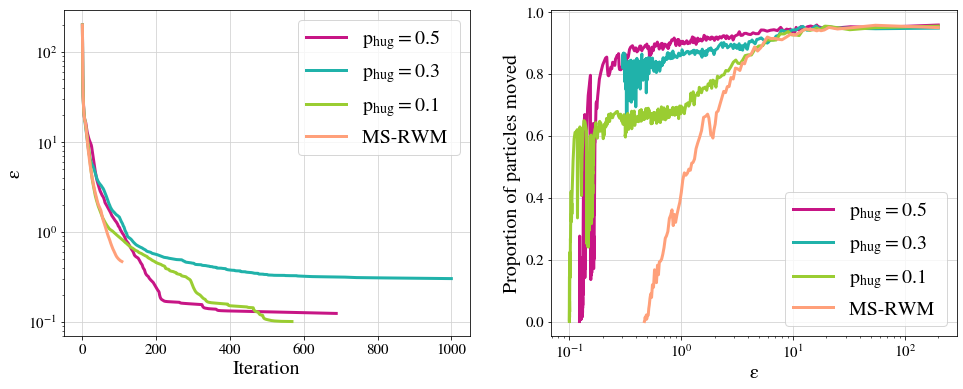

In [11]:
rc('font',**{'family':'STIXGeneral'})
fig, ax = plt.subplots(figsize=(16, 6), ncols=2)
# EPSILON / ITERATION
# ax.plot(B10N5k_HAN.εs, label='phug'+ r'$\mathregular{=0.5}$', color='lightsalmon', lw=3)
ax[0].plot(B20N2k_HAN_05_EPSILONS, label=r'$\mathregular{p_{hug}}$' + r'$\mathregular{=0.5}$', color='mediumvioletred', lw=3)
ax[0].plot(B20N2k_HAN_03_EPSILONS, label=r'$\mathregular{p_{hug}}$' + r'$\mathregular{=0.3}$', color='lightseagreen', lw=3)
ax[0].plot(B20N2k_HAN_01.εs, label=r'$\mathregular{p_{hug}}$' + r'$\mathregular{=0.1}$', color='yellowgreen', lw=3)
ax[0].plot(B20N2500_EPSILONS, label='MS-RWM ', color='lightsalmon', lw=3)
ax[0].set_xlabel("Iteration", fontsize=20)
ax[0].set_ylabel(r"$\mathregular{\epsilon}$", fontsize=20)
ax[0].tick_params(labelsize=15)
ax[0].legend(fontsize=20)
ax[0].set_yscale('log')
ax[0].grid(True, color='lightgray')
# PROP-MOVED / EPSILON
ax[1].plot(B20N2k_HAN_05_EPSILONS[:-1], B20N2k_HAN_05_PM[1:], label=r'$\mathregular{p_{hug}}$' + r'$\mathregular{=0.5}$', color='mediumvioletred', lw=3)
ax[1].plot(B20N2k_HAN_03_EPSILONS[:-1], B20N2k_HAN_03_PM[1:], label=r'$\mathregular{p_{hug}}$' + r'$\mathregular{=0.3}$', color='lightseagreen', lw=3)
ax[1].plot(B20N2k_HAN_01.εs[:-1], B20N2k_HAN_01.PROP_MOVED[1:], label=r'$\mathregular{p_{hug}}$' + r'$\mathregular{=0.1}$', color='yellowgreen', lw=3)
ax[1].plot(B20N2500_EPSILONS[:-1], B20N2500_PM[1:], label='MS-RWM ', color='lightsalmon', lw=3)
ax[1].set_ylabel("Proportion of particles moved", fontsize=20)
ax[1].set_xlabel(r"$\mathregular{\epsilon}$", fontsize=20)
ax[1].tick_params(labelsize=15)
ax[1].legend(fontsize=20)
ax[1].set_xscale('log')
ax[1].grid(True, color='lightgray')
# plt.savefig("figures/gk20_epsilons_and_pm_mshan_b20.png")
plt.show()

# testing

It seems that large $B$ leads to a much larger variation in the contours explored. Perhaps this is what I need when the algorithm gets to small tolerances. For now remove `pm` from stopping criterion.

In [14]:
B100N500_HAN_01 = MSAdaptive(generate_settings(d=d, N=500, B=100,
        δ=0.01, δmin=δmin, min_pm=(1/500), verbose=True, εs_fixed=None, adaptiveε=True, adaptiveδ=False,
        z0_manual=P1_10k[:500], pm_target=0.23, pm_switch=pm_switch, low_memory=True, integrator='hug_and_nhug',
        εprop_switch=0.01, ε0_manual=200.0, quantile_value=0.5, initialization='manual',
        switch_strategy='pm', kernel='uniform',use_autograd=False, stopping_criterion={'εmin', 'maxiter'},
        resampling_scheme='multinomial', maxiter=1000, δadaptation_method=None, adaptiveB=False,
        Bmin=5, Bmax=100, proxy_ap_metric='pm', prop_esjd=0.95, Badaptation_method=None, prop_hug=0.1))
B100N500_HAN_01_PARTICLES = B100N500_HAN_01.sample()

Integrator: HUG + NHUG.
Prop Hug  :  0.1
Stopping criterion:  maxiter, εmin, 
Resampling: MULTINOMIAL.
Iteration:  1
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 51.0161551922033354
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9860000000000000
	Particle Diversity: 0.4400000000000000
	Moved Diversity: 0.4338400000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  2
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 29.9435235538821836
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9880000000000000
	Particle Diversity: 0.4180000000000000
	Moved Diversity: 0.4129840000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  3
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 23.1778279525329758
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Par

	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9460000000000000
	Particle Diversity: 0.4760000000000000
	Moved Diversity: 0.4502960000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  24
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 4.6018392450435073
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9460000000000000
	Particle Diversity: 0.4440000000000000
	Moved Diversity: 0.4200240000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  25
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 4.4340590986791391
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9419999999999999
	Particle Diversity: 0.4620000000000000
	Moved Diversity: 0.4352040000000000
	Step-size kept fixed at: 0.0100000000000000
I

	Trajectories constructed.
	Epsilon: 2.3004044772338204
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9280000000000000
	Particle Diversity: 0.4620000000000000
	Moved Diversity: 0.4287360000000001
	Step-size kept fixed at: 0.0100000000000000
Iteration:  47
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 2.2440327886490214
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9120000000000000
	Particle Diversity: 0.4740000000000000
	Moved Diversity: 0.4322880000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  48
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 2.2162127232787068
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9240000000000000
	Particle Diversity: 0.4800000000000000
	Moved Diversity: 0.4435200

	Trajectories constructed.
	Epsilon: 1.9523371652884818
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8960000000000000
	Particle Diversity: 0.4740000000000000
	Moved Diversity: 0.4247040000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  70
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.9384573228035915
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9040000000000000
	Particle Diversity: 0.4740000000000000
	Moved Diversity: 0.4284960000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  71
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.9269100354409492
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8860000000000000
	Particle Diversity: 0.4960000000000000
	Moved Diversity: 0.4394560

	Trajectories constructed.
	Epsilon: 1.6251956079699843
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9040000000000000
	Particle Diversity: 0.4640000000000000
	Moved Diversity: 0.4194560000000001
	Step-size kept fixed at: 0.0100000000000000
Iteration:  93
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.6131397850197364
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9120000000000000
	Particle Diversity: 0.4660000000000000
	Moved Diversity: 0.4249920000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  94
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.6051198539689073
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8920000000000000
	Particle Diversity: 0.4720000000000000
	Moved Diversity: 0.4210240

	Trajectories constructed.
	Epsilon: 1.3651212733974054
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8940000000000000
	Particle Diversity: 0.4740000000000000
	Moved Diversity: 0.4237560000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  116
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.3595501706873883
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8820000000000000
	Particle Diversity: 0.4700000000000000
	Moved Diversity: 0.4145400000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  117
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.3544121559288895
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9040000000000000
	Particle Diversity: 0.4460000000000000
	Moved Diversity: 0.40318

	Trajectories constructed.
	Epsilon: 1.1791628735865596
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9200000000000000
	Particle Diversity: 0.4760000000000000
	Moved Diversity: 0.4379200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  139
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.1743877678357346
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8960000000000000
	Particle Diversity: 0.4780000000000000
	Moved Diversity: 0.4282880000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  140
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 1.1720016904440946
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9160000000000000
	Particle Diversity: 0.4360000000000000
	Moved Diversity: 0.39937

	Trajectories constructed.
	Epsilon: 0.9617667151711744
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9220000000000000
	Particle Diversity: 0.4700000000000000
	Moved Diversity: 0.4333400000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  162
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.9455390091058224
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9160000000000000
	Particle Diversity: 0.4540000000000000
	Moved Diversity: 0.4158640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  163
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.9314775521681029
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8860000000000000
	Particle Diversity: 0.4800000000000000
	Moved Diversity: 0.42528

	Trajectories constructed.
	Epsilon: 0.7343369191574423
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9100000000000000
	Particle Diversity: 0.4400000000000000
	Moved Diversity: 0.4004000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  185
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.7215034838732119
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9080000000000000
	Particle Diversity: 0.4580000000000000
	Moved Diversity: 0.4158640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  186
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.7060638327643358
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8740000000000000
	Particle Diversity: 0.4660000000000000
	Moved Diversity: 0.40728

	Trajectories constructed.
	Epsilon: 0.5336418280223568
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8640000000000000
	Particle Diversity: 0.4840000000000000
	Moved Diversity: 0.4181760000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  208
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.5299303095845231
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9180000000000000
	Particle Diversity: 0.4560000000000000
	Moved Diversity: 0.4186080000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  209
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.5258507289199112
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.9140000000000000
	Particle Diversity: 0.4660000000000000
	Moved Diversity: 0.42592

	Trajectories constructed.
	Epsilon: 0.3954668945800451
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8920000000000000
	Particle Diversity: 0.4680000000000000
	Moved Diversity: 0.4174560000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  231
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3863844043673725
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8740000000000000
	Particle Diversity: 0.4400000000000000
	Moved Diversity: 0.3845600000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  232
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.3770619903073296
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8960000000000000
	Particle Diversity: 0.4520000000000000
	Moved Diversity: 0.40499

	Trajectories constructed.
	Epsilon: 0.2727368412206365
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8680000000000000
	Particle Diversity: 0.4500000000000000
	Moved Diversity: 0.3906000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  254
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.2704974451753862
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8460000000000000
	Particle Diversity: 0.3960000000000000
	Moved Diversity: 0.3350160000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  255
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.2679252287508801
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8620000000000000
	Particle Diversity: 0.4340000000000000
	Moved Diversity: 0.37410

	Trajectories constructed.
	Epsilon: 0.2296131235335057
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6980000000000000
	Particle Diversity: 0.4220000000000000
	Moved Diversity: 0.2945560000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  277
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.2294228456682250
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7160000000000000
	Particle Diversity: 0.4220000000000000
	Moved Diversity: 0.3021520000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  278
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.2292341740363467
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7600000000000000
	Particle Diversity: 0.4360000000000000
	Moved Diversity: 0.33136

	Trajectories constructed.
	Epsilon: 0.2004513260199329
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8960000000000000
	Particle Diversity: 0.4820000000000000
	Moved Diversity: 0.4318720000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  300
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1990293086938993
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8640000000000000
	Particle Diversity: 0.4580000000000000
	Moved Diversity: 0.3957120000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  301
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1983651495623916
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7900000000000000
	Particle Diversity: 0.4360000000000000
	Moved Diversity: 0.34444

	Trajectories constructed.
	Epsilon: 0.1707021238066935
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8040000000000000
	Particle Diversity: 0.4320000000000000
	Moved Diversity: 0.3473280000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  323
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1701467038312833
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.8100000000000001
	Particle Diversity: 0.4280000000000000
	Moved Diversity: 0.3466800000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  324
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1697569284768747
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.7520000000000000
	Particle Diversity: 0.4520000000000000
	Moved Diversity: 0.33990

	Trajectories constructed.
	Epsilon: 0.1644692231754989
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5540000000000000
	Particle Diversity: 0.4260000000000000
	Moved Diversity: 0.2360040000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  346
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1644159110155069
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.6100000000000000
	Particle Diversity: 0.4160000000000000
	Moved Diversity: 0.2537600000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  347
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1643564240216558
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5800000000000000
	Particle Diversity: 0.4280000000000000
	Moved Diversity: 0.24824

	Trajectories constructed.
	Epsilon: 0.1634392086739737
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4980000000000000
	Particle Diversity: 0.4400000000000000
	Moved Diversity: 0.2191200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  369
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1634083433213636
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5140000000000000
	Particle Diversity: 0.3900000000000000
	Moved Diversity: 0.2004600000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  370
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1633741873541513
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5400000000000000
	Particle Diversity: 0.4240000000000000
	Moved Diversity: 0.22896

	Trajectories constructed.
	Epsilon: 0.1625982257498222
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4820000000000000
	Particle Diversity: 0.4520000000000000
	Moved Diversity: 0.2178640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  392
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1625686847397443
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4800000000000000
	Particle Diversity: 0.4340000000000000
	Moved Diversity: 0.2083200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  393
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1625334107448555
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4800000000000000
	Particle Diversity: 0.4300000000000000
	Moved Diversity: 0.20640

	Trajectories constructed.
	Epsilon: 0.1619097041500670
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5140000000000000
	Particle Diversity: 0.4320000000000000
	Moved Diversity: 0.2220480000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  415
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1618751963815737
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5780000000000000
	Particle Diversity: 0.4080000000000000
	Moved Diversity: 0.2358240000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  416
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1618258600456268
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4400000000000000
	Particle Diversity: 0.4140000000000000
	Moved Diversity: 0.18216

	Trajectories constructed.
	Epsilon: 0.1611476319065626
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4220000000000000
	Particle Diversity: 0.4340000000000000
	Moved Diversity: 0.1831480000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  438
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1611251988422988
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5080000000000000
	Particle Diversity: 0.4320000000000000
	Moved Diversity: 0.2194560000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  439
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1610998955483898
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4660000000000000
	Particle Diversity: 0.4240000000000000
	Moved Diversity: 0.19758

	Trajectories constructed.
	Epsilon: 0.1604103264000631
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5120000000000000
	Particle Diversity: 0.4440000000000000
	Moved Diversity: 0.2273280000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  461
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1603785189772474
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4760000000000000
	Particle Diversity: 0.4280000000000000
	Moved Diversity: 0.2037280000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  462
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1603446763817809
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5420000000000000
	Particle Diversity: 0.4240000000000000
	Moved Diversity: 0.22980

	Trajectories constructed.
	Epsilon: 0.1596614324448301
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3660000000000000
	Particle Diversity: 0.4540000000000000
	Moved Diversity: 0.1661640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  484
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1596384772557634
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4120000000000000
	Particle Diversity: 0.4280000000000000
	Moved Diversity: 0.1763360000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  485
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1596182566751719
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4720000000000000
	Particle Diversity: 0.4040000000000000
	Moved Diversity: 0.19068

	Trajectories constructed.
	Epsilon: 0.1591232100175543
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5200000000000000
	Particle Diversity: 0.4260000000000000
	Moved Diversity: 0.2215200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  507
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1590869521515730
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4780000000000000
	Particle Diversity: 0.4340000000000000
	Moved Diversity: 0.2074520000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  508
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1590520581292384
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5160000000000000
	Particle Diversity: 0.4200000000000000
	Moved Diversity: 0.21672

	Trajectories constructed.
	Epsilon: 0.1584361087326989
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5000000000000000
	Particle Diversity: 0.4300000000000000
	Moved Diversity: 0.2150000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  530
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1584056369627214
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5160000000000000
	Particle Diversity: 0.4220000000000000
	Moved Diversity: 0.2177520000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  531
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1583646668830775
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5160000000000000
	Particle Diversity: 0.4160000000000000
	Moved Diversity: 0.21465

	Trajectories constructed.
	Epsilon: 0.1576334482115410
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4640000000000000
	Particle Diversity: 0.4500000000000000
	Moved Diversity: 0.2088000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  553
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1576065876494936
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4220000000000000
	Particle Diversity: 0.4280000000000000
	Moved Diversity: 0.1806160000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  554
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1575774731635435
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4340000000000000
	Particle Diversity: 0.4260000000000000
	Moved Diversity: 0.18488

	Trajectories constructed.
	Epsilon: 0.1569358268886325
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5000000000000000
	Particle Diversity: 0.4260000000000000
	Moved Diversity: 0.2130000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  576
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1569009136053644
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4700000000000000
	Particle Diversity: 0.4080000000000000
	Moved Diversity: 0.1917600000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  577
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1568698269071181
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4720000000000000
	Particle Diversity: 0.4360000000000000
	Moved Diversity: 0.20579

	Trajectories constructed.
	Epsilon: 0.1562750291976018
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4040000000000000
	Particle Diversity: 0.4440000000000000
	Moved Diversity: 0.1793760000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  599
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1562568273148033
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3940000000000000
	Particle Diversity: 0.4500000000000000
	Moved Diversity: 0.1773000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  600
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1562301940584637
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4860000000000000
	Particle Diversity: 0.4200000000000000
	Moved Diversity: 0.20412

	Trajectories constructed.
	Epsilon: 0.1556584413939754
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3740000000000000
	Particle Diversity: 0.4240000000000000
	Moved Diversity: 0.1585760000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  622
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1556349204886821
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3860000000000000
	Particle Diversity: 0.4200000000000000
	Moved Diversity: 0.1621200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  623
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1556143423887752
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4560000000000000
	Particle Diversity: 0.4220000000000000
	Moved Diversity: 0.19243

	Trajectories constructed.
	Epsilon: 0.1550864397685739
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4560000000000000
	Particle Diversity: 0.3940000000000000
	Moved Diversity: 0.1796640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  645
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1550552762553771
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4220000000000000
	Particle Diversity: 0.4120000000000000
	Moved Diversity: 0.1738640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  646
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1550308570483507
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5100000000000000
	Particle Diversity: 0.4120000000000000
	Moved Diversity: 0.21012

	Trajectories constructed.
	Epsilon: 0.1544831491614469
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4400000000000000
	Particle Diversity: 0.4100000000000000
	Moved Diversity: 0.1804000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  668
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1544606728416088
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3540000000000000
	Particle Diversity: 0.4160000000000000
	Moved Diversity: 0.1472640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  669
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1544386906236105
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4260000000000000
	Particle Diversity: 0.4000000000000000
	Moved Diversity: 0.17040

	Trajectories constructed.
	Epsilon: 0.1538804721253210
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4260000000000000
	Particle Diversity: 0.3620000000000000
	Moved Diversity: 0.1542120000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  691
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1538594391422302
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3420000000000000
	Particle Diversity: 0.4720000000000000
	Moved Diversity: 0.1614240000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  692
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1538375668279793
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3420000000000000
	Particle Diversity: 0.4160000000000000
	Moved Diversity: 0.14227

	Trajectories constructed.
	Epsilon: 0.1533422015474315
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3660000000000000
	Particle Diversity: 0.4300000000000000
	Moved Diversity: 0.1573800000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  714
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1533190057589868
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4520000000000000
	Particle Diversity: 0.4100000000000000
	Moved Diversity: 0.1853200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  715
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1532968848821491
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4720000000000000
	Particle Diversity: 0.4040000000000000
	Moved Diversity: 0.19068

	Trajectories constructed.
	Epsilon: 0.1527138368742621
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4720000000000000
	Particle Diversity: 0.4200000000000000
	Moved Diversity: 0.1982400000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  737
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1526910688512633
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4940000000000000
	Particle Diversity: 0.4440000000000000
	Moved Diversity: 0.2193360000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  738
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1526644248056525
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4640000000000000
	Particle Diversity: 0.4360000000000000
	Moved Diversity: 0.20230

	Trajectories constructed.
	Epsilon: 0.1520119893973142
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3980000000000000
	Particle Diversity: 0.4380000000000000
	Moved Diversity: 0.1743240000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  760
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1519907967762656
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3640000000000000
	Particle Diversity: 0.4120000000000000
	Moved Diversity: 0.1499680000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  761
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1519700444153822
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5800000000000000
	Particle Diversity: 0.3840000000000000
	Moved Diversity: 0.22272

	Trajectories constructed.
	Epsilon: 0.1403565071314605
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4780000000000000
	Particle Diversity: 0.4300000000000000
	Moved Diversity: 0.2055400000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  783
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1403295575509421
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4600000000000000
	Particle Diversity: 0.4320000000000000
	Moved Diversity: 0.1987200000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  784
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1402934697968266
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4500000000000000
	Particle Diversity: 0.4380000000000000
	Moved Diversity: 0.19710

	Trajectories constructed.
	Epsilon: 0.1397863944478615
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4280000000000000
	Particle Diversity: 0.4120000000000000
	Moved Diversity: 0.1763360000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  806
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1397629742045354
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3500000000000000
	Particle Diversity: 0.4200000000000000
	Moved Diversity: 0.1470000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  807
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1397389529855764
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4700000000000000
	Particle Diversity: 0.4000000000000000
	Moved Diversity: 0.18800

	Trajectories constructed.
	Epsilon: 0.1392026282944484
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3580000000000000
	Particle Diversity: 0.3940000000000000
	Moved Diversity: 0.1410520000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  829
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1391811332424293
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3720000000000000
	Particle Diversity: 0.4120000000000000
	Moved Diversity: 0.1532640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  830
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1391575036995146
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3880000000000000
	Particle Diversity: 0.4400000000000000
	Moved Diversity: 0.17072

	Trajectories constructed.
	Epsilon: 0.1387107879960749
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2840000000000000
	Particle Diversity: 0.4460000000000000
	Moved Diversity: 0.1266640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  852
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1386938992064678
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3300000000000000
	Particle Diversity: 0.3960000000000000
	Moved Diversity: 0.1306800000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  853
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1386766991065945
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3380000000000000
	Particle Diversity: 0.3620000000000000
	Moved Diversity: 0.12235

	Trajectories constructed.
	Epsilon: 0.1382765310758170
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.5280000000000000
	Particle Diversity: 0.3700000000000000
	Moved Diversity: 0.1953600000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  875
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1382418204346277
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4940000000000000
	Particle Diversity: 0.4140000000000000
	Moved Diversity: 0.2045160000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  876
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1381917942060264
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4720000000000000
	Particle Diversity: 0.4380000000000000
	Moved Diversity: 0.20673

	Trajectories constructed.
	Epsilon: 0.1377431623924323
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2920000000000000
	Particle Diversity: 0.4420000000000000
	Moved Diversity: 0.1290640000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  898
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1377255856937822
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2780000000000000
	Particle Diversity: 0.4420000000000000
	Moved Diversity: 0.1228760000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  899
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1377092191276229
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3620000000000000
	Particle Diversity: 0.3600000000000000
	Moved Diversity: 0.13032

	Trajectories constructed.
	Epsilon: 0.1372353100359718
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3800000000000000
	Particle Diversity: 0.4000000000000000
	Moved Diversity: 0.1520000000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  921
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1372150907932856
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3720000000000000
	Particle Diversity: 0.4320000000000000
	Moved Diversity: 0.1607040000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  922
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1371944178719038
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3000000000000000
	Particle Diversity: 0.4300000000000000
	Moved Diversity: 0.12900

	Trajectories constructed.
	Epsilon: 0.1367002895948981
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3640000000000000
	Particle Diversity: 0.4340000000000000
	Moved Diversity: 0.1579760000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  944
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1366828486490553
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.2960000000000000
	Particle Diversity: 0.4600000000000000
	Moved Diversity: 0.1361600000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  945
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1366684846211828
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3180000000000000
	Particle Diversity: 0.3620000000000000
	Moved Diversity: 0.11511

	Trajectories constructed.
	Epsilon: 0.1363038593785795
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.4360000000000000
	Particle Diversity: 0.3960000000000000
	Moved Diversity: 0.1726560000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  967
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1362858506674377
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3860000000000000
	Particle Diversity: 0.4160000000000000
	Moved Diversity: 0.1605760000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  968
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1362593619745892
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3820000000000000
	Particle Diversity: 0.4300000000000000
	Moved Diversity: 0.16426

	Trajectories constructed.
	Epsilon: 0.1357954691927316
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3340000000000000
	Particle Diversity: 0.3980000000000000
	Moved Diversity: 0.1329320000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  990
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1357757857711612
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3020000000000000
	Particle Diversity: 0.4180000000000000
	Moved Diversity: 0.1262360000000000
	Step-size kept fixed at: 0.0100000000000000
Iteration:  991
	Quantile Value:  0.5
	Trajectories constructed.
	Epsilon: 0.1357581760393008
	Weights computed and normalized.
	SMC Weights computed and normalized.
	Particles Resampled.
	Velocities refreshed.
	Prop Moved: 0.3880000000000000
	Particle Diversity: 0.4160000000000000
	Moved Diversity: 0.16140

In [16]:
with open("experiment94/B10N5k_HAN_01_epsilons.pkl", "rb") as file:
    B10N5k_HAN_01_EPSILONS = pickle.load(file)

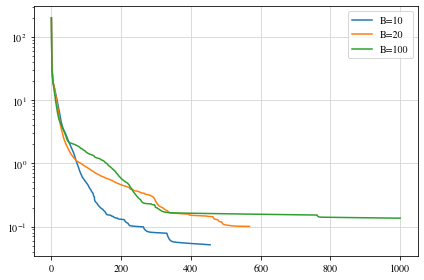

In [17]:
fig, ax = plt.subplots()
ax.plot(B10N5k_HAN_01_EPSILONS, label='B=10')
ax.plot(B20N2k_HAN_01.εs, label='B=20')
ax.plot(B100N500_HAN_01.εs, label='B=100')
ax.set_yscale('log')
ax.grid(True, color='lightgray')
ax.legend()
plt.tight_layout()
plt.show()

$$
\begin{align}
    0 &\rightarrow 1, 2 \\
    1 &\rightarrow 3, 4 \\
    2 &\rightarrow 5, 6
\end{align}
$$

In [35]:
BBB = 10
AAA = zeros((BBB+1))
for bbb in range(BBB//2):
    AAA[2*bbb+1]   = (bbb*100) + 1
    AAA[2*bbb+2]     = (bbb*100) + 2

In [36]:
AAA

array([  0.,   1.,   2., 101., 102., 201., 202., 301., 302., 401., 402.])